# Imports

In [65]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.tree
import sklearn.metrics

import matplotlib.pyplot as plt
import pandas_bokeh
import sys

import warnings

In [2]:
sys.path.append('..')
%reload_ext autoreload
%autoreload 2
%matplotlib inline
pandas_bokeh.output_notebook()
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

Loading BokehJS ...

# Chapter 08 - Bagging, Boosting and Random Forests

* **bagging**, that often considers homogeneous weak learners, learns them independently from each other in parallel and combines them following some kind of deterministic averaging process

* **boosting**, that often considers homogeneous weak learners, learns them sequentially in a very adaptative way (a base model depends on the previous ones) and combines them following a deterministic strategy

* **stacking**, that often considers heterogeneous weak learners, learns them in parallel and combines them by training a meta-model to output a prediction based on the different weak models predictions

Ensemble learning.
---
Weak learners (correctly) combined into a more robust and accurate method

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Two families of ensemble methods are usually distinguished:

* In **averaging methods**, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.

    Examples: Bagging methods, Forests of randomized trees, …

* By contrast, in **boosting methods**, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.

    Examples: AdaBoost, Gradient Tree Boosting, etc.
    
(scikit-learn)


The decision trees discussed in Section 8.1 suffer from high variance. This means that if we split the training data into two parts at random, and fit a decision tree to both halves, the results that we get could be quite different. In contrast, a procedure with low variance will yield similar results if applied repeatedly to distinct data sets; linear regression tends to have low variance, if the ratio of n to p is moderately large. Bootstrap aggregation, or bagging, is a general-purpose procedure for reducing the bagging variance of a statistical learning method.

Recall that given a set of n independent observations Z1,...,Zn, each with variance σ2, the variance of the mean Z¯ of the observations is given by σ2/n. In other words, averaging a set of observations reduces variance.


(Page 316). 


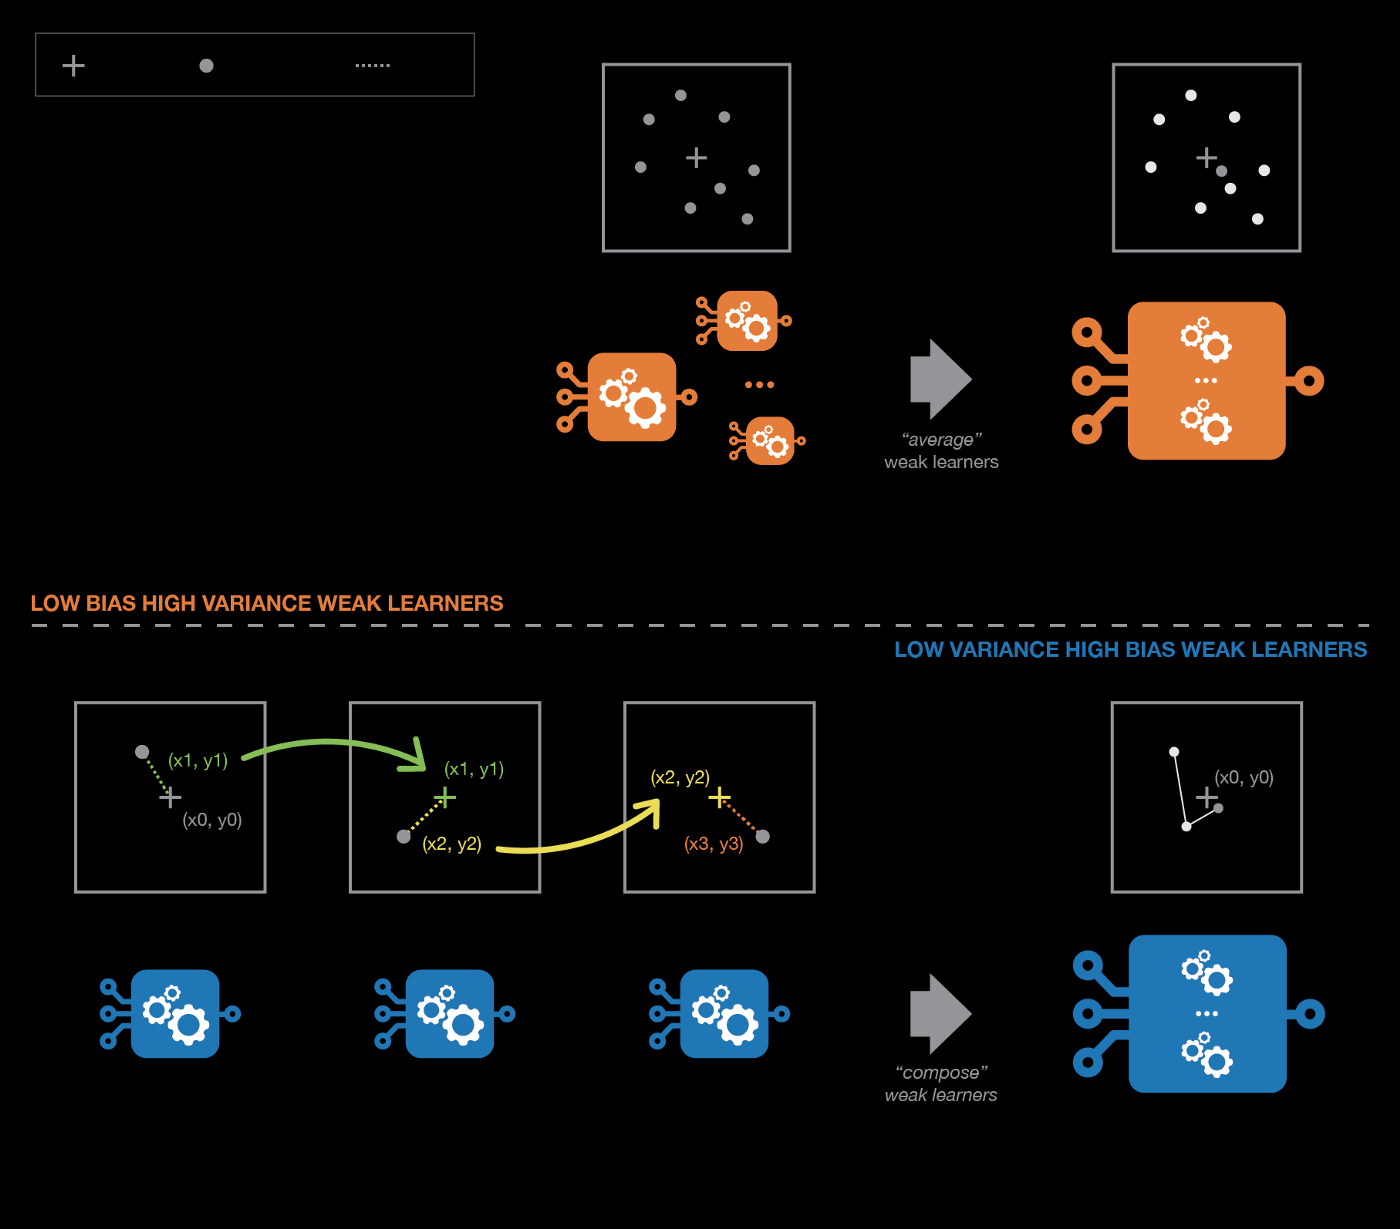

## Bootstrapping 

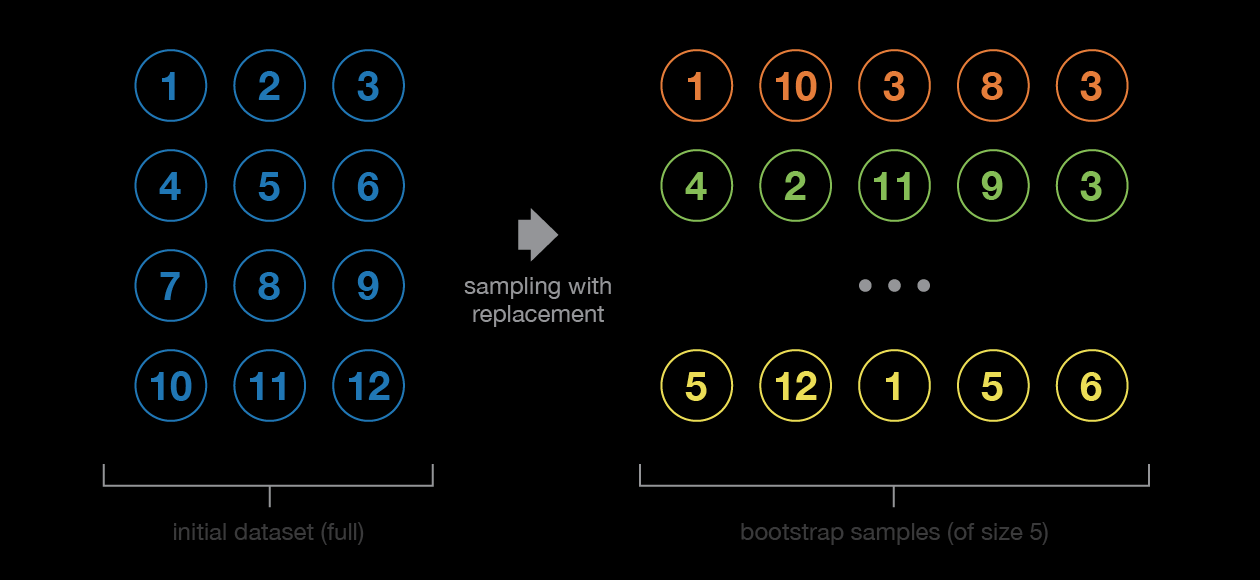

### Bagging
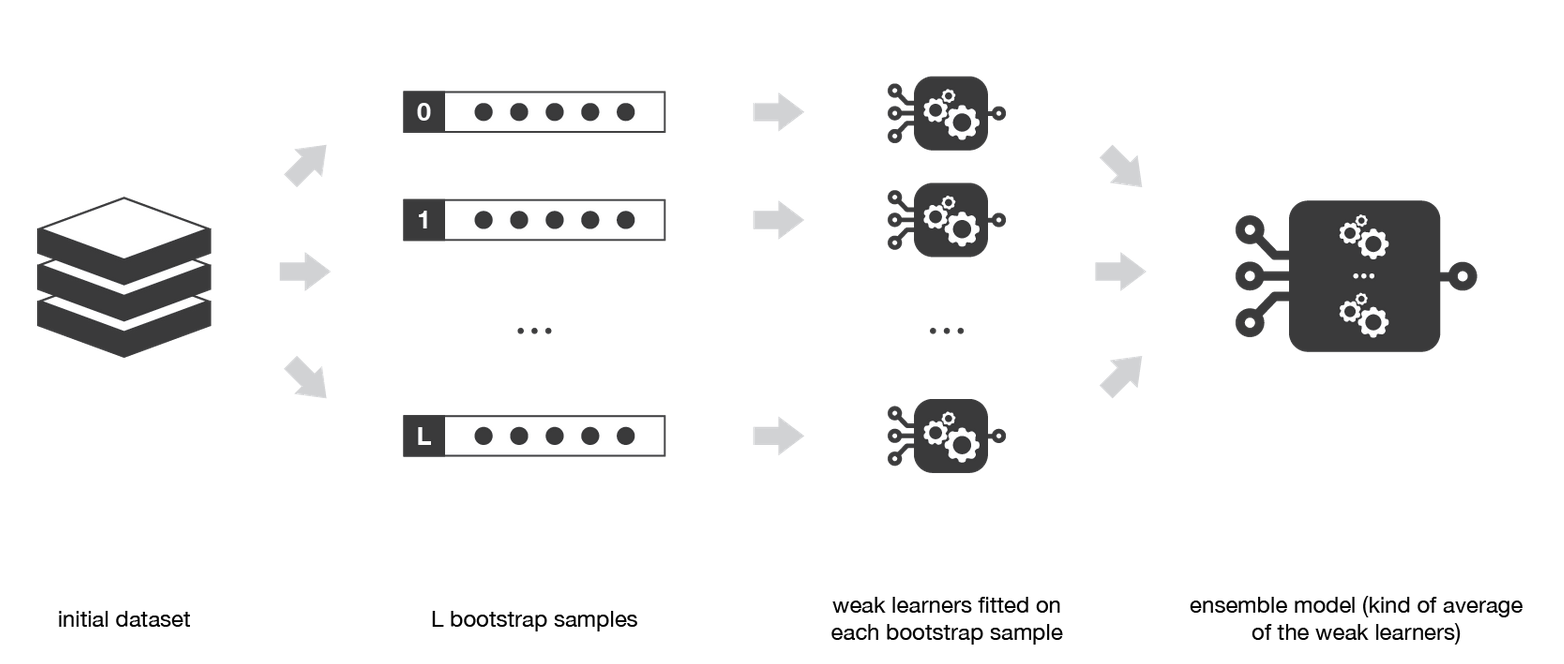

### Modelling

In [27]:
df = pd.read_csv('../../data/raw/heart.csv')
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df.dropna(inplace=True)
df['AHD'] = np.where(df['AHD'] == 'Yes', 1, 0)
df = pd.get_dummies(df)
df

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,0,1,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,1,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,1,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,0,1,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,140,241,0,0,123,1,0.2,2,0.0,1,1,0,0,0,0,0,1
298,45,1,110,264,0,0,132,0,1.2,2,0.0,1,0,0,0,1,0,0,1
299,68,1,144,193,1,0,141,0,3.4,2,2.0,1,1,0,0,0,0,0,1
300,57,1,130,131,0,0,115,1,1.2,2,1.0,1,1,0,0,0,0,0,1


In [62]:
def train_evaluate_model(model, x_train, x_test, y_train, y_test, ensemble_method='bagging'):
    if ensemble_method == 'bagging':
        ensemble = BaggingClassifier(model, max_samples=0.5, max_features=0.5, n_estimators=10)
    elif ensemble_method == 'boosting':
        ensemble = AdaBoostClassifier(model, n_estimators=50)
    else:
        print("error")
    
    model.fit(x_train, y_train)
    ensemble.fit(x_train, y_train)
    
    y_hat_model_train = model.predict(x_train)
    y_hat_model_test  = model.predict(x_test)
    
    y_hat_ensemble_train = ensemble.predict(x_train)
    y_hat_ensemble_test  = ensemble.predict(x_test)
    
    print("*"*20, "TRAIN - Model", "*"*20)
    print(sklearn.metrics.classification_report(y_train, y_hat_model_train))
    print("*"*20, "TEST - Model", "*"*20)
    print(sklearn.metrics.classification_report(y_test, y_hat_model_test))
    print("="*58)
    print("*"*20, "TRAIN - Ensemble", "*"*20)
    print(sklearn.metrics.classification_report(y_train, y_hat_ensemble_train))
    print("*"*20, "TEST - Ensemble", "*"*20)
    print(sklearn.metrics.classification_report(y_test, y_hat_ensemble_test))
    return model, ensemble
    

In [28]:
columns = df.drop('AHD', axis=1).columns.to_list()

In [32]:
x_train, x_test, y_train, y_test = train_test_split(df[columns], df['AHD'], stratify=df['AHD'], test_size=0.25, random_state=42)

In [33]:
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

#### Model

In [34]:
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5, n_estimators=100)

In [49]:
train_evaluate_model(KNeighborsClassifier(), x_train, x_test, y_train, y_test)

******************** TRAIN - Model ********************
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       120
           1       0.77      0.70      0.73       102

    accuracy                           0.77       222
   macro avg       0.77      0.76      0.76       222
weighted avg       0.77      0.77      0.76       222

******************** TEST - Model ********************
              precision    recall  f1-score   support

           0       0.64      0.72      0.68        40
           1       0.63      0.54      0.58        35

    accuracy                           0.64        75
   macro avg       0.64      0.63      0.63        75
weighted avg       0.64      0.64      0.64        75

******************** TRAIN - Ensemble ********************
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       120
           1       0.72      0.75      0.74       102

    accuracy

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                       leaf_size=30,
                                                       metric='minkowski',
                                                       metric_params=None,
                                                       n_jobs=None,
                                                       n_neighbors=5, p=2,
                                                       weights='uniform'),
                   bootstrap=True, bootstrap_features=False, max_features=0.5,
                   max_samples=0.5, n_estimators=10, n_jobs=None,
                   oob_score=False, random_state=None, verbose=0,
                   warm_start=False))

In [52]:
train_evaluate_model(LogisticRegression(), x_train, x_test, y_train, y_test)

******************** TRAIN - Model ********************
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       120
           1       0.89      0.81      0.85       102

    accuracy                           0.87       222
   macro avg       0.87      0.87      0.87       222
weighted avg       0.87      0.87      0.87       222

******************** TEST - Model ********************
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        40
           1       0.88      0.83      0.85        35

    accuracy                           0.87        75
   macro avg       0.87      0.86      0.87        75
weighted avg       0.87      0.87      0.87        75

******************** TRAIN - Ensemble ********************
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       120
           1       0.85      0.77      0.81       102

    accuracy

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None, max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', t

Implement KFold Cross-Validation and try with tree-methods to check the variance and accuracy!
---

In [53]:
### CODE ####

### Random Forests
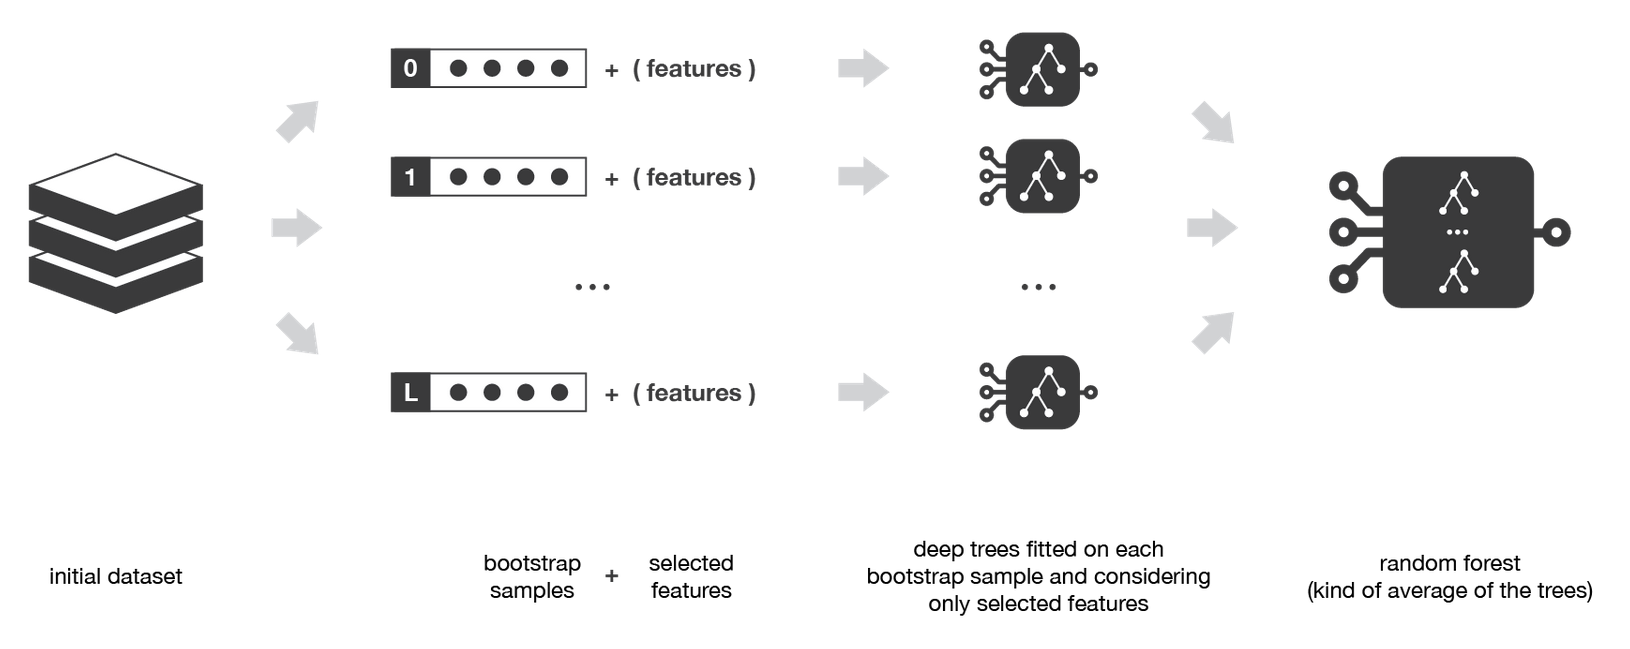

#### Model

In [80]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train, y_train)
print("*"*20, "TRAIN - Random Forest", "*"*20)
print(sklearn.metrics.classification_report(y_train, rf.predict(x_train)))
print("="*54)
print("*"*20, "TEST - Random Forest", "*"*20)
print(sklearn.metrics.classification_report(y_test, rf.predict(x_test)))

******************** TRAIN - Random Forest ********************
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       120
           1       0.99      0.97      0.98       102

    accuracy                           0.98       222
   macro avg       0.98      0.98      0.98       222
weighted avg       0.98      0.98      0.98       222

******************** TEST - Random Forest ********************
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        40
           1       0.76      0.63      0.69        35

    accuracy                           0.73        75
   macro avg       0.74      0.73      0.73        75
weighted avg       0.74      0.73      0.73        75



Implement KFold Cross-Validation and try with tree-methods to check the variance and accuracy!
---

In [53]:
### CODE ####

Check Extremely Randomized Trees
---

In [ ]:
### CODE ####

### Boosting
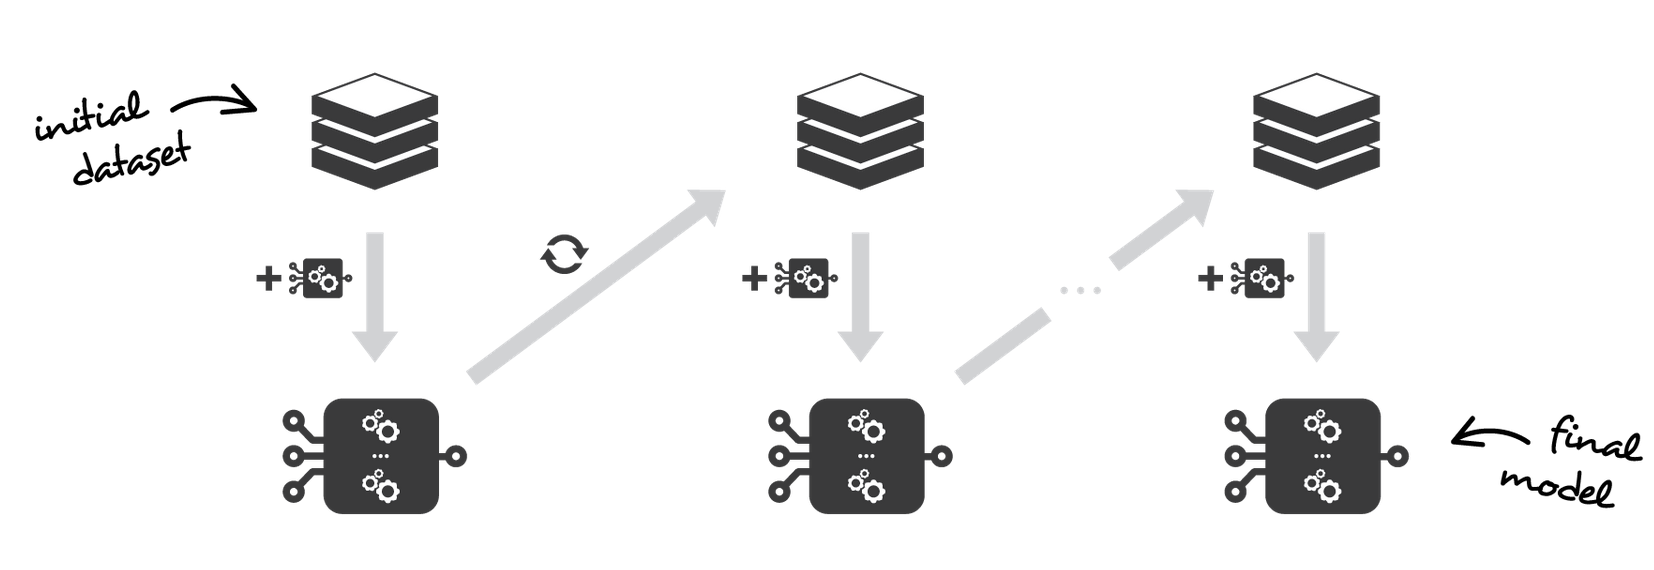

#### Model

In [66]:
AdaBoostClassifier(LogisticRegression())

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=50, random_state=None)

In [64]:
train_evaluate_model(LogisticRegression(), x_train, x_test, y_train, y_test, ensemble_method='boosting')

******************** TRAIN - Model ********************
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       120
           1       0.89      0.81      0.85       102

    accuracy                           0.87       222
   macro avg       0.87      0.87      0.87       222
weighted avg       0.87      0.87      0.87       222

******************** TEST - Model ********************
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        40
           1       0.88      0.83      0.85        35

    accuracy                           0.87        75
   macro avg       0.87      0.86      0.87        75
weighted avg       0.87      0.87      0.87        75

******************** TRAIN - Ensemble ********************
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       120
           1       0.86      0.80      0.83       102

    accuracy

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 AdaBoostClassifier(algorithm='SAMME.R',
                    base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=100,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                        

In [68]:
gbc = GradientBoostingClassifier()
gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [74]:
gbc.fit(x_train, y_train)
print("*"*20, "TRAIN - Gradient Boosting Trees", "*"*20)
print(sklearn.metrics.classification_report(y_train, gbc.predict(x_train)))
print("="*54)
print("*"*20, "TEST - Gradient Boosting Trees", "*"*20)
print(sklearn.metrics.classification_report(y_test, gbc.predict(x_test)))

******************** TRAIN - Gradient Boosting Trees ********************
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       120
           1       1.00      0.99      1.00       102

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

******************** TEST - Gradient Boosting Trees ********************
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        40
           1       0.85      0.80      0.82        35

    accuracy                           0.84        75
   macro avg       0.84      0.84      0.84        75
weighted avg       0.84      0.84      0.84        75



#### XGBoost

In [75]:
xgb = XGBClassifier()
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [76]:
xgb.fit(x_train, y_train)
print("*"*20, "TRAIN - Gradient Boosting Trees", "*"*20)
print(sklearn.metrics.classification_report(y_train, xgb.predict(x_train)))
print("="*54)
print("*"*20, "TEST - Gradient Boosting Trees", "*"*20)
print(sklearn.metrics.classification_report(y_test, xgb.predict(x_test)))

******************** TRAIN - Gradient Boosting Trees ********************
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       120
           1       1.00      0.98      0.99       102

    accuracy                           0.99       222
   macro avg       0.99      0.99      0.99       222
weighted avg       0.99      0.99      0.99       222

******************** TEST - Gradient Boosting Trees ********************
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        40
           1       0.84      0.77      0.81        35

    accuracy                           0.83        75
   macro avg       0.83      0.82      0.82        75
weighted avg       0.83      0.83      0.83        75



### Light GBM

In [77]:
lgb = LGBMClassifier()
lgb

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [78]:
lgb.fit(x_train, y_train)
print("*"*20, "TRAIN - Gradient Boosting Trees", "*"*20)
print(sklearn.metrics.classification_report(y_train, lgb.predict(x_train)))
print("="*54)
print("*"*20, "TEST - Gradient Boosting Trees", "*"*20)
print(sklearn.metrics.classification_report(y_test, lgb.predict(x_test)))

******************** TRAIN - Gradient Boosting Trees ********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       102

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222

******************** TEST - Gradient Boosting Trees ********************
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        40
           1       0.84      0.77      0.81        35

    accuracy                           0.83        75
   macro avg       0.83      0.82      0.82        75
weighted avg       0.83      0.83      0.83        75



# References
* https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205
* http://faculty.marshall.usc.edu/gareth-james/ISL/ (chapter 08)
* https://scikit-learn.org/stable/modules/ensemble.html
* https://xgboost.readthedocs.io/en/latest/
* https://lightgbm.readthedocs.io/en/latest/